# Clustering con PYTHON

1. Carga de datos Telecomunicaciones y conociendo variabels
2. Clustering jerarquico (Dendograma)
    - Distancias
    - Enlaces
3. Clustering K-Means

    - Metodo del codo

### Importando librerias a usar

In [2]:
# Importamos las variables numpy y le ponemos un alias, para poder llamarlos de manera ams rapida 
import numpy as np
import pandas as pd

In [3]:
# Esta función nos servira para plantar una semilla y hace que los valores aleatorios con los que trabajamos no varien
np.random.seed(1991)

### Importando data y realizando una selección selectiva

In [4]:
# Importamos nuestra base de datos telecomunicaciones y luego lo asignamos a "data" y con drop obviamos lo que no queremos
data = (pd.read_csv("C:/Users/fguti/Downloads/Telecomunicaciones.csv")).drop(["region", "permanencia", "edad", "estado_civil", "dirección", "ingresos_familiares", "nivel_educativo", "empleo", "jubilado", "genero",
                                                                              "n_pers_hogar", "larga_distancia_mes", "llamadas_gratuitas_mes", "equipo_mes", "Tarjeta_mes", "inhalámbrico_mes", "larga_distancia_per", 
                                                                              "llamadas_gratuitas_per", "equipos_per", "tarjeta_per", "inhalámbrico_per", "categoria_cliente", "rotación_mes"], axis=1)


### Mostrar Tabla

In [5]:
# Mostramos tabla solo las primeras 3 filas
data.head(3)

,llamada_gratuitas,alquiler_equipo,tarjeta_llamada,Inhalámbrico,lineas_múltiples,mensaje_voz,servicio_busca,internet,identificador_llamada,llamada_espera,desvio_llamadas,llamada_a_tres,facturación_electrónica
0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,1,1,0,1,1,0,1,1,1,1,0
2,1,0,1,0,0,0,0,0,1,1,0,1,0


### Seleciónando las 7 columnas Clasificados  por el uso  y no uso de los servicios

In [6]:
# Definimos un vector con cada una de las variables a trabajar
variables = ["llamada_gratuitas", "alquiler_equipo", "tarjeta_llamada", "Inhalámbrico", "lineas_múltiples", "mensaje_voz", 
"servicio_busca", "internet", "identificador_llamada", "llamada_espera", "desvio_llamadas", "llamada_a_tres", "facturación_electrónica"]

# Definimos un nuevo data llamado tele
tele = data[variables]
# Mostramos las 7 variables
tele.head()

,llamada_gratuitas,alquiler_equipo,tarjeta_llamada,Inhalámbrico,lineas_múltiples,mensaje_voz,servicio_busca,internet,identificador_llamada,llamada_espera,desvio_llamadas,llamada_a_tres,facturación_electrónica
0,0,0,1,0,0,0,0,0,0,0,1,0,0
1,1,0,1,1,0,1,1,0,1,1,1,1,0
2,1,0,1,0,0,0,0,0,1,1,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,1,1,0


### Calculo de Correlación entre todas la variables

In [7]:
cor = tele.corr() # Calcula correlación entrw todas las variables

In [8]:
# Mostrara Correlación
cor

,llamada_gratuitas,alquiler_equipo,tarjeta_llamada,Inhalámbrico,lineas_múltiples,mensaje_voz,servicio_busca,internet,identificador_llamada,llamada_espera,desvio_llamadas,llamada_a_tres,facturación_electrónica
llamada_gratuitas,1.000000,0.004262,0.362735,0.402287,0.011430,0.334831,0.402594,0.002359,0.609288,0.645604,0.594134,0.572988,-0.044998
alquiler_equipo,0.004262,1.000000,-0.082244,0.394828,0.290608,0.346781,0.366004,0.600359,0.001373,-0.021413,0.011101,-0.011388,0.568914
tarjeta_llamada,0.362735,-0.082244,1.000000,0.259325,0.141217,0.213508,0.200006,-0.024426,0.363594,0.364728,0.371346,0.362315,-0.095422
Inhalámbrico,0.402287,0.394828,0.259325,1.000000,0.238638,0.614427,0.657137,0.386431,0.436793,0.409568,0.416575,0.418009,0.336408
lineas_múltiples,0.011430,0.290608,0.141217,0.238638,1.000000,0.211577,0.205298,0.270731,0.002104,0.038566,0.019326,0.046258,0.243643
mensaje_voz,0.334831,0.346781,0.213508,0.614427,0.211577,1.000000,0.537861,0.343179,0.364521,0.367832,0.383217,0.366939,0.311496
servicio_busca,0.402594,0.366004,0.200006,0.657137,0.205298,0.537861,1.000000,0.358603,0.380342,0.370926,0.379504,0.341448,0.311889
internet,0.002359,0.600359,-0.024426,0.386431,0.270731,0.343179,0.358603,1.000000,0.024868,0.002157,0.018979,0.005242,0.538582
identificador_llamada,0.609288,0.001373,0.363594,0.436793,0.002104,0.364521,0.380342,0.024868,1.000000,0.635605,0.619977,0.610598,-0.030871
llamada_espera,0.645604,-0.021413,0.364728,0.409568,0.038566,0.367832,0.370926,0.002157,0.635605,1.000000,0.619920,0.582387,-0.061861


### Clustering Jerarquico (Dendograma)

Método aglomerativo donde cada punto empieza siendo un unico cluster y en cada paso los vamos jutando hasta tener un único cluster basados en las similitudes de las obvservaciones.

**Pasos**
1. Empezamos con cada observación en el cluster
2. Encontramos la menos distancia en la matriz de distancias y unimos las dos observaciones de un nuevo cluster
3. Reclutamos las distancias entre los cluster antiguos y el nuevo recién creado con alguno de los metodos de enlace vistos
4. Repetimos los pasos 2 y 3 hasta que solo quede un cluster con la N observación

In [9]:
# Importamos librerias para mostrara en dendograma
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix

- Vamos a usar la función Linkage para que nos arme mediante las similitudes y los enlaces respectivos y asi obtener un dendograma

### Distancias

In [10]:
dd1 = distance_matrix(data[variables], data[variables],p=1)
dd2 = distance_matrix(data[variables], data[variables],p=2)

### Enlaces

Los enlaces sirven para unir grupos hasta tener unico cluster general con todas las observaciones, el enlace a usar en este ejercicio sera el de "WARD" que une dos grupos con la minima variación intracluster

In [11]:
#Usamos linkage  para generar automaticamente el clustering aglomerativo
z = linkage(tele, "ward")

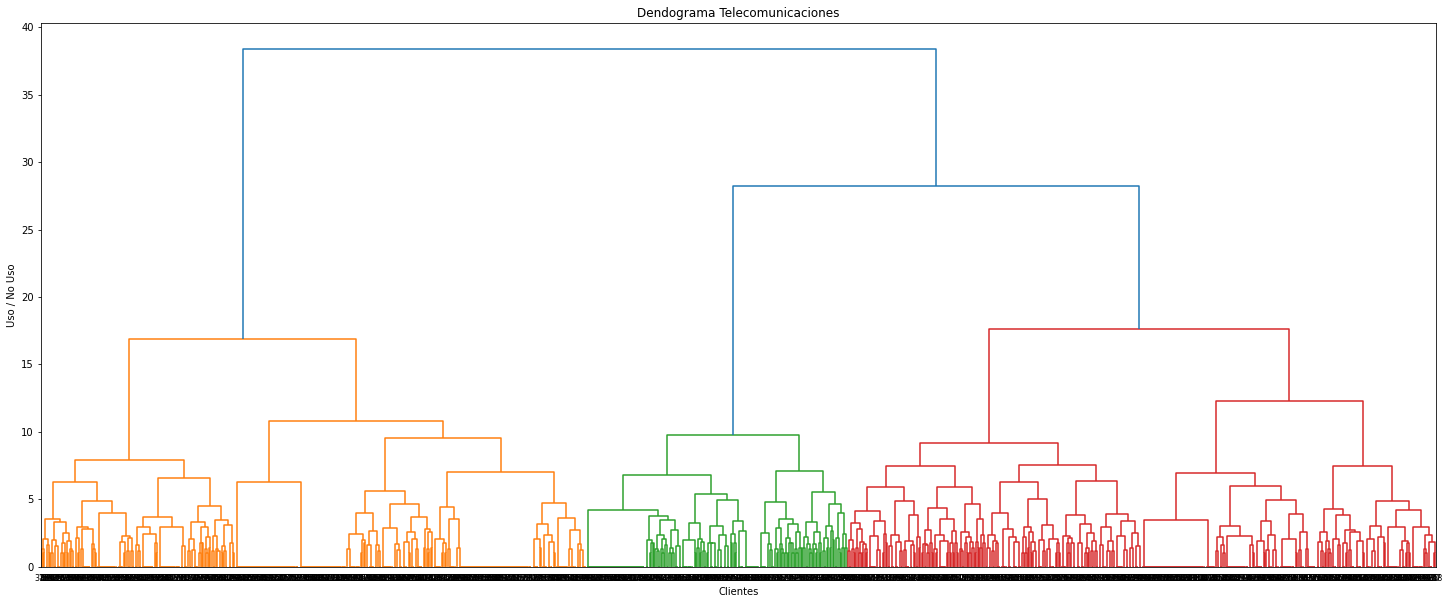

In [12]:
plt.figure(figsize =(25, 10)) # Dimensión para el grafico
plt.title("Dendograma Telecomunicaciones") # Titulo
plt.xlabel("Clientes") #Etique eje X
plt.ylabel("Uso / No Uso") # Etiqueta eje Y
dendrogram(z,leaf_rotation=0.,leaf_font_size=8)
plt.show()

### Segunda parte